In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pyplot import figure

In [20]:
def vis_prediction(dataframe, no_features, first_feature, last_feature, line, location_line):
    fig, axes = plt.subplots(no_features, 1, figsize=(20,20))
    ax = axes.ravel()
    columns = dataframe.columns
    t = dataframe["up time"]
    for i in range(first_feature,last_feature):
        # Values about appearance of anomaly 
        palette = []
        anomaly_label = dataframe.iloc[:, i+3*no_features].values
        if 0 in anomaly_label and 1 not in anomaly_label:
            palette = ["blue"]
        elif 1 in anomaly_label and 0 not in anomaly_label:
            palette = ["red"]
        elif 0 in anomaly_label and 1 in anomaly_label:
            palette = ["blue","red"]
        # Predicted sensor values
        sns.lineplot(data=dataframe, 
                     x=t, 
                     y=columns[i+no_features], 
                     ax=ax[i-first_feature], 
                     linewidth=1,
                     color="black")
        # Target sensor values (actual sensor values)
        sns.scatterplot(data=dataframe, 
                        x=t, 
                        y=columns[i],
                        ax=ax[i-first_feature],
                        hue=columns[i+3*no_features], 
                        palette=palette)
        
        # Line to show known failures
        if line:
            for location in location_line:
                ax[i-first_feature].axvline(location, 0,2, color="r", linestyle ="--", linewidth=2)

In [27]:
def vis_reconstruction_error(dataframe, no_features, first_feature, last_feature):
    fig, axes = plt.subplots(no_features, 1, figsize=(20,20))
    ax = axes.ravel()
    columns = dataframe.columns
    t = dataframe.iloc[:,0]
    for i in range(first_feature, last_feature):
        sns.lineplot(data=dataframe, 
                     x=t, 
                     y=dataframe.iloc[:, i+2*no_features],
                     ax=ax[i-first_feature],
                     color="blue",)
        
        threshold = [0.5,1,2.5,1,0.5,5,5,3,5,3,3,20]
        
        if i == 1:
            ax[i-first_feature].axhline(threshold[0], color="r", linestyle ="-", linewidth=1)
        elif i == 2:
            ax[i-first_feature].axhline(threshold[1], color="r", linestyle ="-", linewidth=1)
        elif i == 3:
            ax[i-first_feature].axhline(threshold[2], color="r", linestyle ="-", linewidth=1)
        elif i == 4:
            ax[i-first_feature].axhline(threshold[3], color="r", linestyle ="-", linewidth=1)
        elif i == 5:
            ax[i-first_feature].axhline(threshold[4], color="r", linestyle ="-", linewidth=1)
        elif i == 6:
            ax[i-first_feature].axhline(threshold[5], color="r", linestyle ="-", linewidth=1)
        elif i == 7:
            ax[i-first_feature].axhline(threshold[6], color="r", linestyle ="-", linewidth=1)
        elif i == 8:
            ax[i-first_feature].axhline(threshold[7], color="r", linestyle ="-", linewidth=1)
        elif i == 9:
            ax[i-first_feature].axhline(threshold[8], color="r", linestyle ="-", linewidth=1)
        elif i == 10:
            ax[i-first_feature].axhline(threshold[9], color="r", linestyle ="-", linewidth=1)
        elif i == 11:
            ax[i-first_feature].axhline(threshold[10], color="r", linestyle ="-", linewidth=1)
        else:
            ax[i-first_feature].axhline(threshold[11], color="r", linestyle ="-", linewidth=1)

## Predicted Data

In [25]:
artifical_data = pd.read_csv("../../files/prediction/MSE/phm_recipe_67.csv", sep=";")
training_set = artifical_data.iloc[:10000,:]

## Reconstruction Error during Training

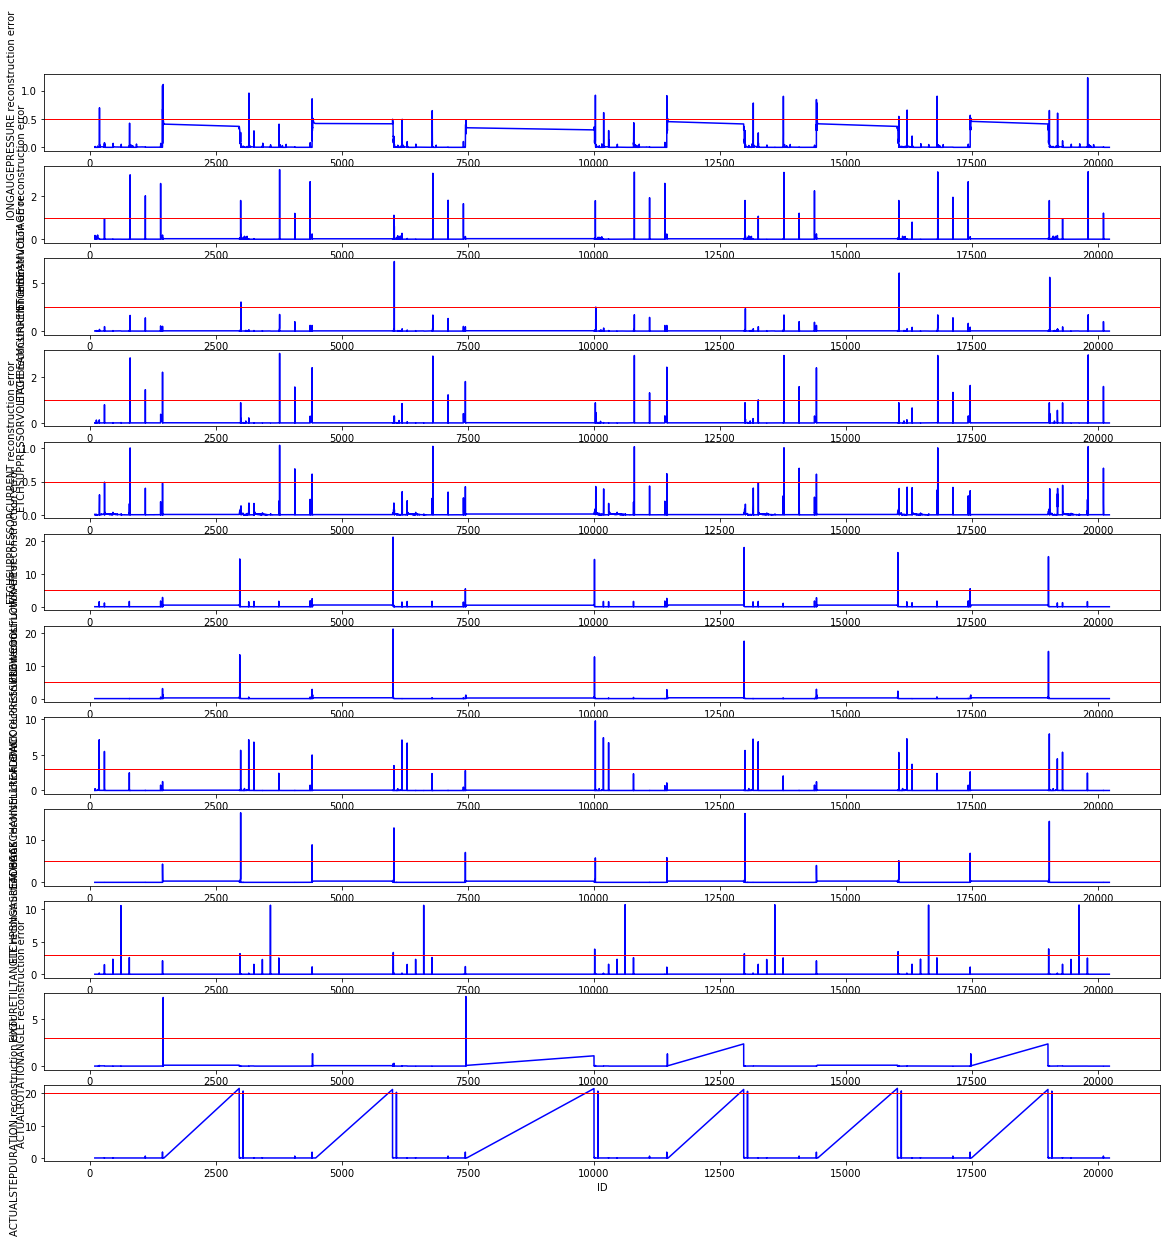

In [28]:
vis_reconstruction_error(training_set, 12, 1, 13)
plt.show()

__Threshold Sensor 1:__ 0.5 <br>
__Threshold Sensor 2:__ 1 <br>
__Threshold Sensor 3:__ 2.5 <br>
__Threshold Sensor 4:__ 1 <br>
__Threshold Sensor 5:__ 0.5 <br>
__Threshold Sensor 6:__ 5 <br>
__Threshold Sensor 7:__ 5 <br>
__Threshold Sensor 8:__ 3 <br>
__Threshold Sensor 9:__ 5 <br>
__Threshold Sensor 10:__ 3 <br>
__Threshold Sensor 11:__ 3 <br>
__Threshold Sensor 12:__ 20 <br>

# Visualisation and Evaluation of Prediction
## Failures

In [29]:
all_failures_67 =[3807966., 3814610., 3815890., 3816362., 3856686., 3860122., 3865202., 3867646., 3868170.,
       3870094., 6539522., 6549554., 6572426., 6573162., 6574566., 6575118., 6575566., 6577254., 6582502., 6586022.]

## Examples of predictions before failures 

In [30]:
artifical_data = pd.read_csv("../../files/prediction/MSE/phm_recipe_67.csv", sep=";")
subset_1 = artifical_data.loc[(artifical_data["up time"]>= 3805966) & (artifical_data["up time"]<= 3818362)]

In [31]:
failures = [3807966., 3814610., 3815890., 3816362.]

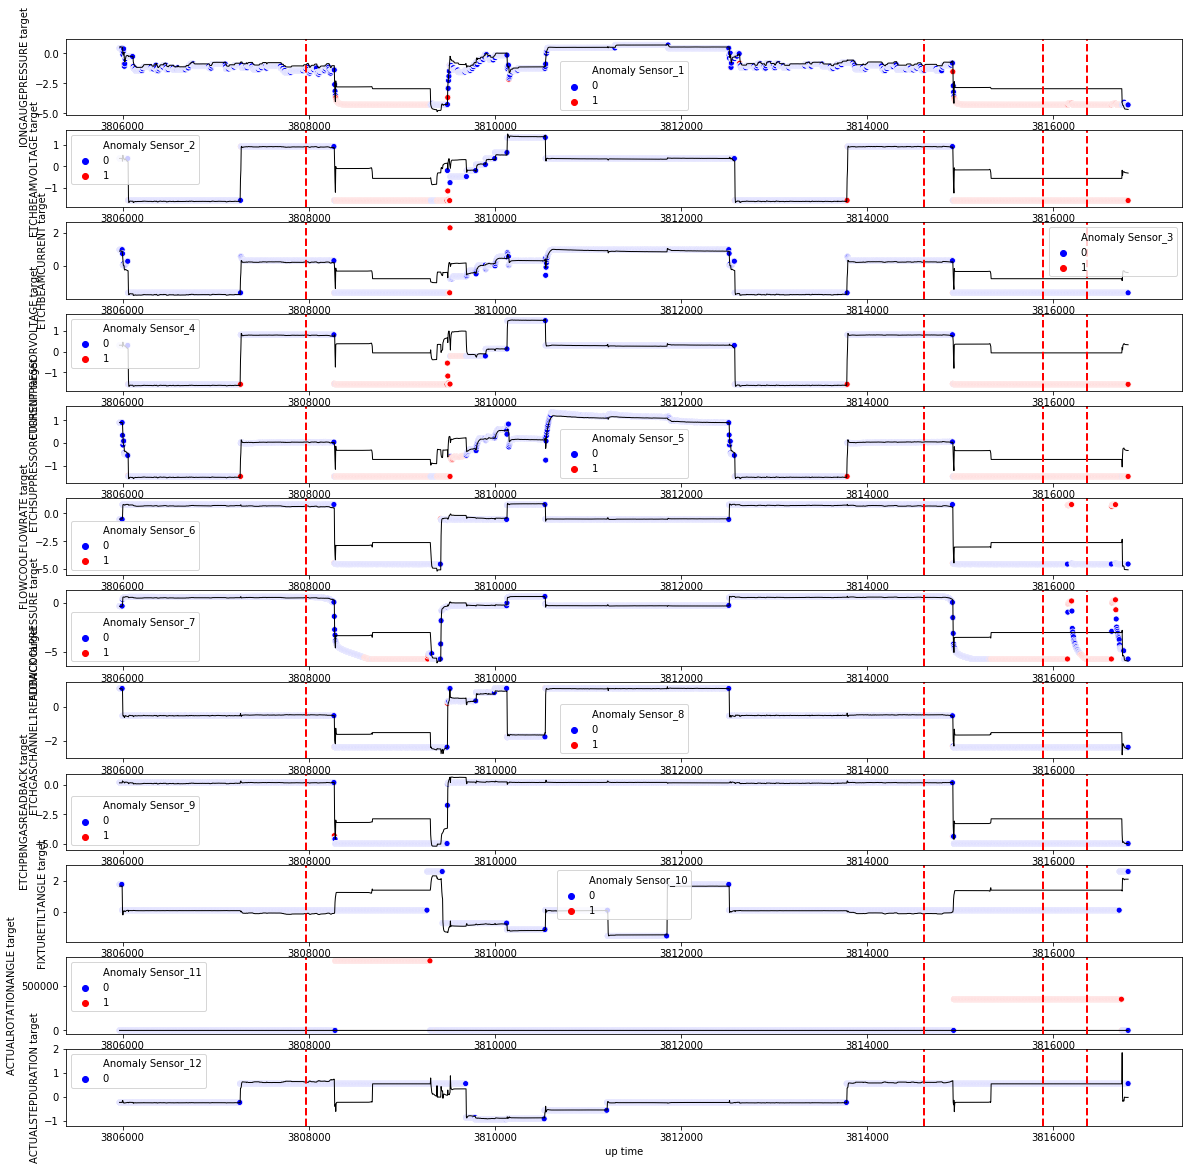

In [32]:
vis_prediction(dataframe = subset_1,
                         no_features=12, 
                         first_feature=1, 
                         last_feature=13,
                         line = True,
                         location_line = failures
                        )
plt.show()

## Evaluation Metrics

In [33]:
def vis_anomaly_detection(dataframe, no_features, first_feature, last_feature, failures, line, training):
    fig, axes = plt.subplots(no_features, 1, figsize=(30,40))
    ax = axes.ravel()
    columns = dataframe.columns
    t = dataframe["up time"]
    for i in range(first_feature, last_feature):
        sns.lineplot(data=dataframe, 
                     x=t, 
                     y=dataframe.iloc[:, i+3*no_features].cumsum(),
                     ax=ax[i-first_feature],
                     color="blue",)
        
        # Plot line for last training sample
        if training:
            ax[i-1].axvspan(3283834,3523830, alpha=0.2, color='green')
        
        # Plot line for failure points
        if line:
            for failure in failures:
                ax[i-first_feature].axvline(failure, 0,2, color="r", linestyle ="--", linewidth=2)
        
        # Set y-limit
        ax[i-first_feature].set_ylim(0,15000)

### Cumulative Sum of Anomaly, labeld by LSTM-Model

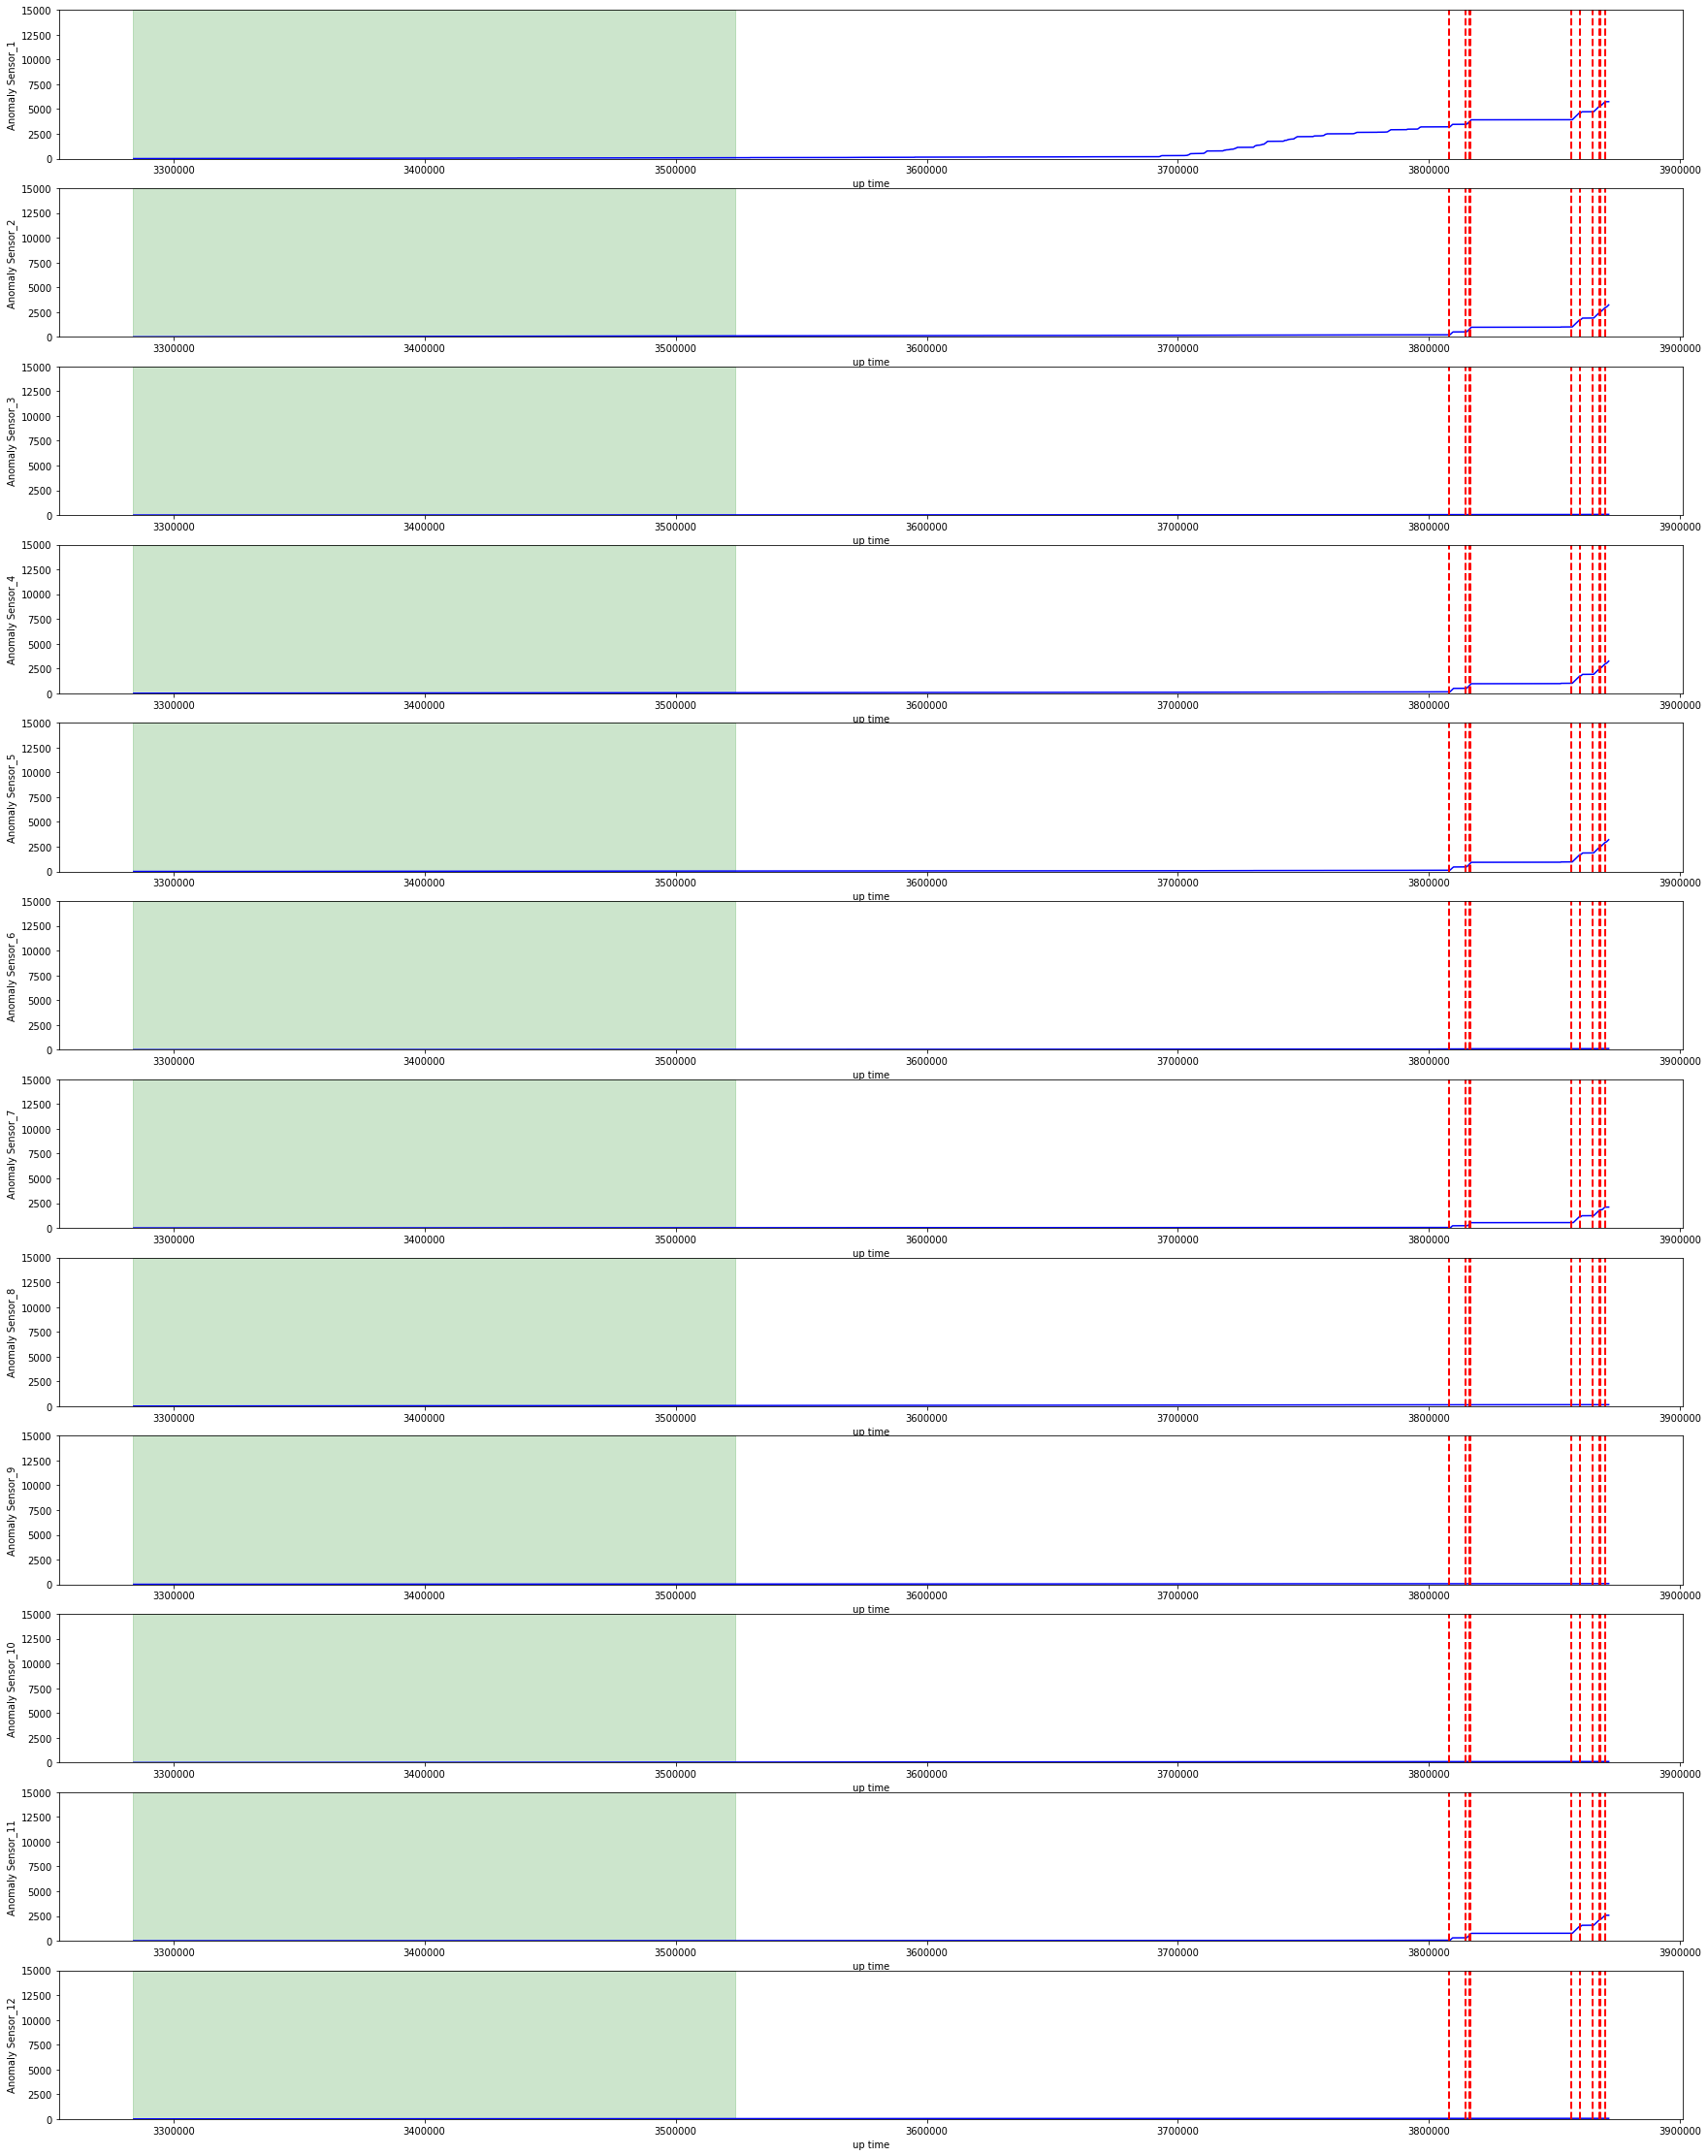

In [34]:
subset_1 = artifical_data.iloc[0:75000,:]
failures_67_subset1 =[3807966., 3814610., 3815890., 3816362., 3856686., 3860122., 3865202., 3867646., 3868170., 3870094.]
vis_anomaly_detection(subset_1, 12, 1, 13, failures_67_subset1, line=True, training=True)
plt.show()

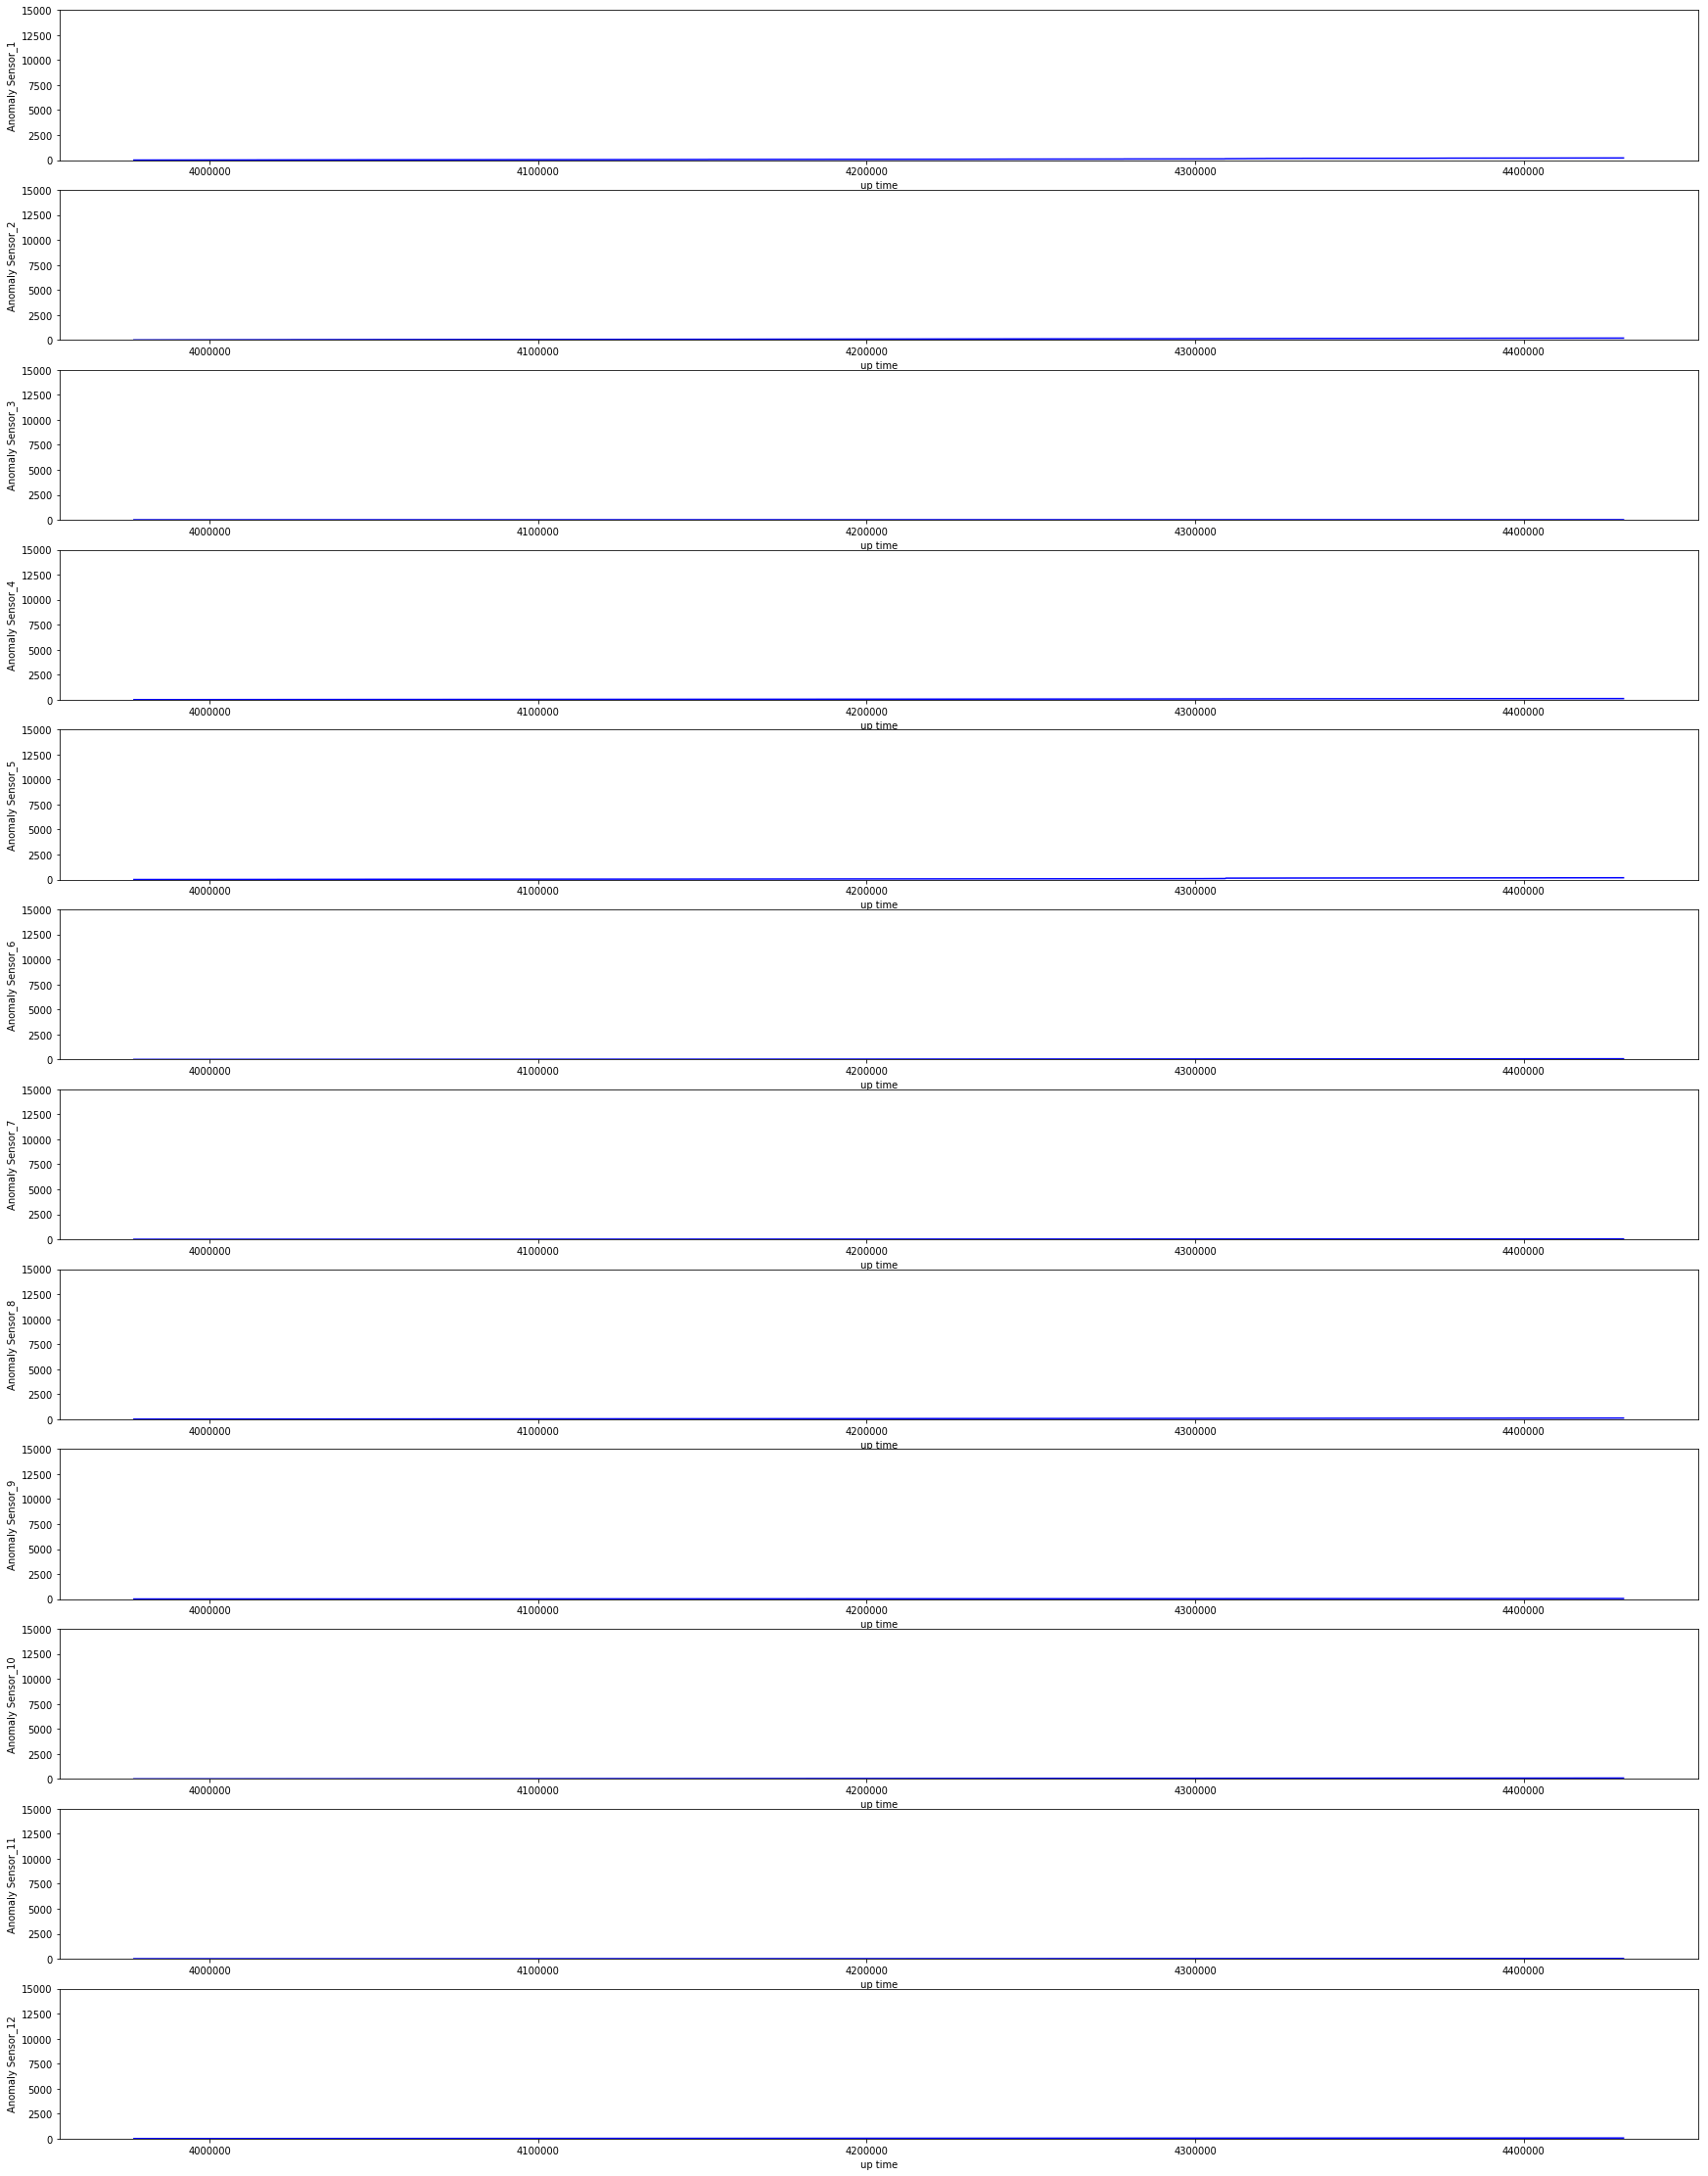

In [35]:
subset_2 = artifical_data.iloc[90000:150000,:]
vis_anomaly_detection(subset_2, 12, 1, 13, failures_67_subset1, line=False, training=False)
plt.show()

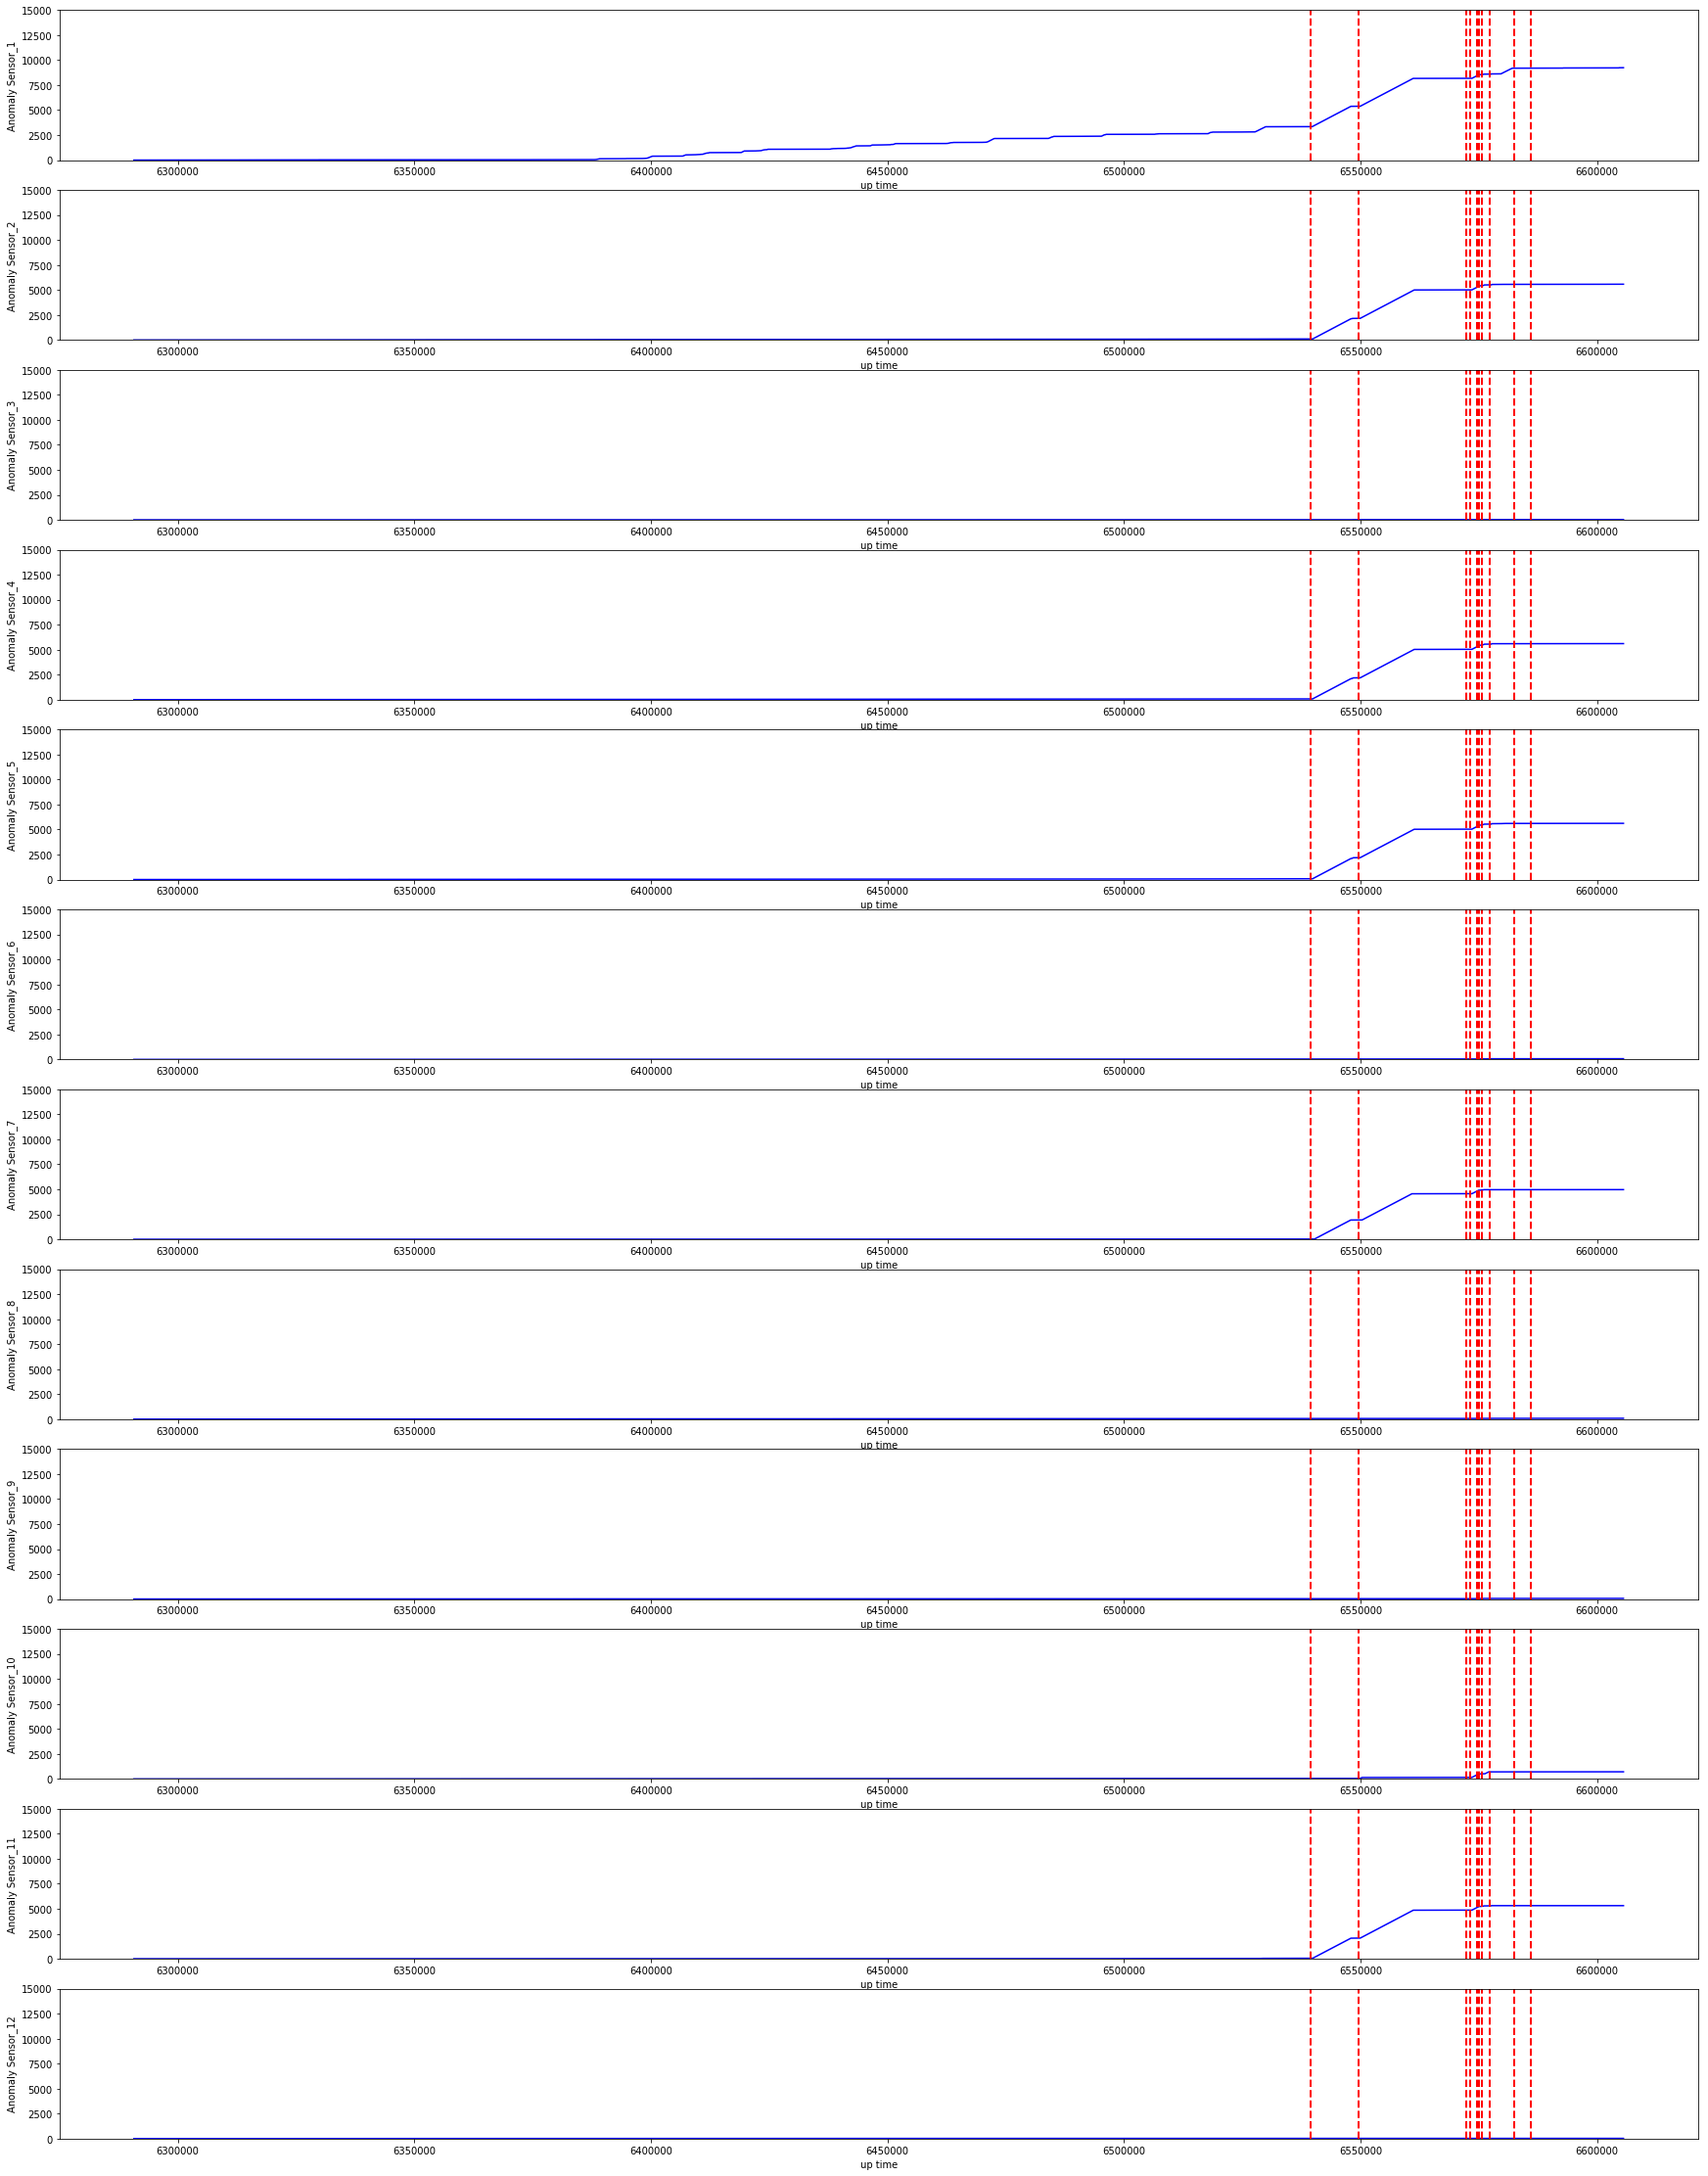

In [36]:
subset_5 = artifical_data.iloc[380000:425000,:]
failures_67_subset5 =[6539522., 6549554., 6572426., 6573162., 6574566., 6575118., 6575566., 6577254., 6582502., 6586022.]
vis_anomaly_detection(subset_5, 12, 1, 13, failures_67_subset5, line=True, training=False)
plt.show()